In [1]:


import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 12})



In [2]:
filename = '/Users/gabrielm/Desktop/DATA-LASP/ded_dmin.nc'
dataset = nc.Dataset(filename)

In [4]:
print(dataset)

# Prudhoe Bay, Alaska

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source_of_Data: United States Geological Survey (USGS)
    Station_Name: Deadhorse
    IAGA_CODE: DED
    Latitude: 70.3552
    Longitude: -148.7928
    Elevation: 10
    Sensor_Orientation: HDZF
    Digital_Sampling: 100.0 second
    Data_Interval_Type: filtered 1-minute (00:15-01:45)
    Data_Type: Definitive
    url: https://geomag.usgs.gov/monitoring/observatories/deadhorse
    file_conversion_author: Greg Lucas (glucas@usgs.gov)
    dimensions(sizes): Time(3156480)
    variables(dimensions): int64 Time(Time), float64 X(Time), float64 Y(Time), float64 Z(Time)
    groups: 


In [5]:
print(dataset.__dict__)

{'Source_of_Data': 'United States Geological Survey (USGS)', 'Station_Name': 'Deadhorse', 'IAGA_CODE': 'DED', 'Latitude': 70.3552, 'Longitude': -148.7928, 'Elevation': 10, 'Sensor_Orientation': 'HDZF', 'Digital_Sampling': '100.0 second', 'Data_Interval_Type': 'filtered 1-minute (00:15-01:45)', 'Data_Type': 'Definitive', 'url': 'https://geomag.usgs.gov/monitoring/observatories/deadhorse', 'file_conversion_author': 'Greg Lucas (glucas@usgs.gov)'}


In [6]:
for dim in dataset.dimensions.values():
    print(dim)


<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 3156480


In [7]:
for var in dataset.variables.values():
    print(var)


<class 'netCDF4._netCDF4.Variable'>
int64 Time(Time)
    units: minutes since 2011-01-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: Time
current shape = (3156480,)
filling on, default _FillValue of -9223372036854775806 used
<class 'netCDF4._netCDF4.Variable'>
float64 X(Time)
    _FillValue: nan
    description: X-component (Geographic North) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (3156480,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Y(Time)
    _FillValue: nan
    description: Y-component (Geographic East) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (3156480,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Z(Time)
    _FillValue: nan
    description: Z-component (Geographic Down [-r]) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (3156480,)
filling on


In [8]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [18]:
df.fillna(0)

,Time,X,Y,Z
0,2011-01-01 00:00:00,8365.7,3307.7,56911.0
1,2011-01-01 00:01:00,8366.3,3308.2,56911.3
2,2011-01-01 00:02:00,8365.4,3308.1,56911.6
3,2011-01-01 00:03:00,8365.7,3307.6,56911.6
4,2011-01-01 00:04:00,8366.6,3306.1,56911.4
...,...,...,...,...
3156475,2016-12-31 23:55:00,8538.4,2749.3,56764.8
3156476,2016-12-31 23:56:00,8532.0,2754.5,56767.7
3156477,2016-12-31 23:57:00,8531.3,2768.2,56768.9
3156478,2016-12-31 23:58:00,8530.2,2766.6,56770.4


Text(0, 0.5, 'X-component of magnetic field')

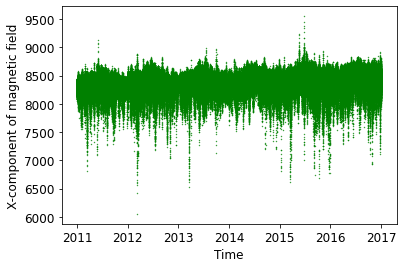

In [26]:
#plot of all data

plt.scatter(df['Time'], df['X'], s=.15, label='data', color='green')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

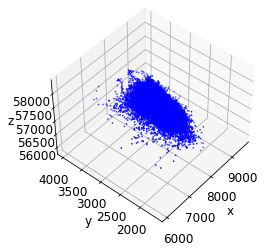

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], s=.5, c='blue')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(45, 220)